In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import plotly.express as px

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import datetime as dt
import time
import matplotlib.pyplot as plt

import holidays
import datetime

In [2]:
import sys 
sys.path.append("..")
%cd ..

C:\Users\User\OneDrive - Danmarks Tekniske Universitet\SAS_030919\6. Semester\BSc\Bachelor2021


In [3]:
from DataPrep.ImportData import importer

In [4]:
df = importer().LagCreation()

In [5]:
df.head()

,Start Date,Label,Charging Time (mins),Energy (kWh),Total Duration (mins),Port Number,CenterLon,CenterLat,Level 1,Level 2,...,Year_Month_10,Year_Month_11,Year_Month_12,is_holiday,is_weekend,Energy (kWh)_lag1,Energy (kWh)_lag2,Energy (kWh)_lag3,Energy (kWh)_lag4,Energy (kWh)_lag5
5,2011-08-03,0.0,518.816402,1.679882,712.717196,16.0,-122.16,37.445,0,8,...,0,0,0,0,0,2.098609,1.260311,2.325573,1.726841,1.562364
6,2011-08-04,0.0,405.733598,1.899242,639.499471,10.0,-122.16,37.445,0,5,...,0,0,0,0,0,1.679882,2.098609,1.260311,2.325573,1.726841
7,2011-08-05,0.0,573.500000,1.574471,592.750000,20.0,-122.16,37.445,0,10,...,0,0,0,0,0,1.899242,1.679882,2.098609,1.260311,2.325573
8,2011-08-06,0.0,897.216667,1.982032,1274.100000,28.0,-122.16,37.445,0,14,...,0,0,0,0,1,1.574471,1.899242,1.679882,2.098609,1.260311
9,2011-08-07,0.0,252.950000,2.232860,1311.750000,6.0,-122.16,37.445,0,3,...,0,0,0,0,1,1.982032,1.574471,1.899242,1.679882,2.098609


In [6]:
df.columns

Index(['Start Date', 'Label', 'Charging Time (mins)', 'Energy (kWh)',
       'Total Duration (mins)', 'Port Number', 'CenterLon', 'CenterLat',
       'Level 1', 'Level 2', '# Professional & Other Places', '# Food',
       '# Shop & Service', '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event', 'Cluster_0.0', 'Cluster_1.0',
       'Cluster_2.0', 'Cluster_3.0', 'Cluster_4.0', 'Cluster_5.0',
       'Cluster_6.0', 'Cluster_7.0', 'Month_Day_1', 'Month_Day_2',
       'Month_Day_3', 'Month_Day_4', 'Month_Day_5', 'Month_Day_6',
       'Month_Day_7', 'Month_Day_8', 'Month_Day_9', 'Month_Day_10',
       'Month_Day_11', 'Month_Day_12', 'Month_Day_13', 'Month_Day_14',
       'Month_Day_15', 'Month_Day_16', 'Month_Day_17', 'Month_Day_18',
       'Month_Day_19', 'Month_Day_20', 'Month_Day_21', 'Month_Day_22',
       'Month_Day_23', 'Month_Day_24', 'Month_Day_25', 'Month_Day_26',
       'Mont

In [7]:
df2 = df.drop(['Energy (kWh)_lag1', 'Energy (kWh)_lag2','Energy (kWh)_lag3', 'Energy (kWh)_lag4', 'Energy (kWh)_lag5',
              'Start Date', 'Label', 'Charging Time (mins)', 'Total Duration (mins)', 'Port Number', 'CenterLon', 'CenterLat',
               'Level 1', 'Level 2', '# Event'], axis=1)

In [8]:
df2.columns

Index(['Energy (kWh)', '# Professional & Other Places', '# Food',
       '# Shop & Service', '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', 'Cluster_0.0', 'Cluster_1.0', 'Cluster_2.0',
       'Cluster_3.0', 'Cluster_4.0', 'Cluster_5.0', 'Cluster_6.0',
       'Cluster_7.0', 'Month_Day_1', 'Month_Day_2', 'Month_Day_3',
       'Month_Day_4', 'Month_Day_5', 'Month_Day_6', 'Month_Day_7',
       'Month_Day_8', 'Month_Day_9', 'Month_Day_10', 'Month_Day_11',
       'Month_Day_12', 'Month_Day_13', 'Month_Day_14', 'Month_Day_15',
       'Month_Day_16', 'Month_Day_17', 'Month_Day_18', 'Month_Day_19',
       'Month_Day_20', 'Month_Day_21', 'Month_Day_22', 'Month_Day_23',
       'Month_Day_24', 'Month_Day_25', 'Month_Day_26', 'Month_Day_27',
       'Month_Day_28', 'Month_Day_29', 'Month_Day_30', 'Month_Day_31',
       'Week_Day_0', 'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4',
       '

In [9]:
#Standardize 
#x_train_standard=(x_train-x_train.mean())/x_train.std()
#x_test_standard=(x_test-x_test.mean())/x_test.std()

In [24]:
stdcols = []
for i in df2.columns: 
    if '#' in i:
        stdcols.append(i)

In [25]:
df2.head()

,Energy (kWh),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,# Nightlife Spot,# Residence,# College & University,...,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12,is_holiday,is_weekend
5,1.679882,309,268,216,211,174,138,119.0,58.0,28.0,...,0,0,0,1,0,0,0,0,0,0
6,1.899242,309,268,216,211,174,138,119.0,58.0,28.0,...,0,0,0,1,0,0,0,0,0,0
7,1.574471,309,268,216,211,174,138,119.0,58.0,28.0,...,0,0,0,1,0,0,0,0,0,0
8,1.982032,309,268,216,211,174,138,119.0,58.0,28.0,...,0,0,0,1,0,0,0,0,0,1
9,2.232860,309,268,216,211,174,138,119.0,58.0,28.0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
df2[['Energy (kWh)'] + stdcols].corr()

,Energy (kWh),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,# Nightlife Spot,# Residence,# College & University
Energy (kWh),1.000000,-0.370661,-0.483810,-0.283539,-0.438581,-0.466101,-0.443982,-0.427675,-0.059531,-0.411112
# Professional & Other Places,-0.370661,1.000000,0.813776,0.443329,0.684022,0.861064,0.756438,0.360094,-0.032812,0.918995
# Food,-0.483810,0.813776,1.000000,0.507621,0.929631,0.985086,0.878097,0.818930,0.020295,0.903486
# Shop & Service,-0.283539,0.443329,0.507621,1.000000,0.167210,0.386358,0.856298,0.583513,0.862613,0.226211
# Travel & Transport,-0.438581,0.684022,0.929631,0.167210,1.000000,0.950997,0.643302,0.748331,-0.315966,0.900811
# Outdoors & Recreation,-0.466101,0.861064,0.985086,0.386358,0.950997,1.000000,0.806905,0.721407,-0.126544,0.962387
# Arts & Entertainment,-0.443982,0.756438,0.878097,0.856298,0.643302,0.806905,1.000000,0.788515,0.482933,0.679238
# Nightlife Spot,-0.427675,0.360094,0.818930,0.583513,0.748331,0.721407,0.788515,1.000000,0.287501,0.507543
# Residence,-0.059531,-0.032812,0.020295,0.862613,-0.315966,-0.126544,0.482933,0.287501,1.000000,-0.296776
# College & University,-0.411112,0.918995,0.903486,0.226211,0.900811,0.962387,0.679238,0.507543,-0.296776,1.000000


In [27]:
df2std = df2.copy()
for col in stdcols: 
    print(col)
    df2std[col] = (df2std[col]-df2std[col].mean())/df2std[col].std()

# Professional & Other Places
# Food
# Shop & Service
# Travel & Transport
# Outdoors & Recreation
# Arts & Entertainment
# Nightlife Spot
# Residence
# College & University


In [28]:
df2std.describe()

,Energy (kWh),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,# Nightlife Spot,# Residence,# College & University,...,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12,is_holiday,is_weekend
count,10655.000000,1.065500e+04,1.065500e+04,1.065500e+04,1.065500e+04,1.065500e+04,10655.000000,1.065500e+04,1.065500e+04,1.065500e+04,...,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000
mean,2.366988,-8.109056e-16,3.414340e-16,6.401887e-17,-1.707170e-16,2.987547e-16,0.000000,4.694717e-16,-2.133962e-17,2.987547e-16,...,0.081370,0.078836,0.081652,0.086532,0.085875,0.091131,0.088597,0.092069,0.037260,0.283810
std,0.651682,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,...,0.273416,0.269496,0.273846,0.281161,0.280193,0.287809,0.284174,0.289138,0.189406,0.450867
min,0.021667,-1.395244e+00,-2.187145e+00,-1.349727e+00,-2.325923e+00,-2.170732e+00,-1.586172,-2.002342e+00,-1.374069e+00,-1.942197e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.866080,-5.340115e-01,-1.536857e-01,-1.349727e+00,1.638416e-01,-2.459759e-02,-0.864980,-8.099630e-02,-1.374069e+00,-2.309501e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.325731,-2.110494e-01,4.666918e-01,4.614081e-01,4.428670e-01,1.974163e-01,0.817803,-1.474299e-02,-1.378246e-01,5.425775e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.835486,1.457588e+00,8.458114e-01,1.168192e+00,6.360383e-01,9.744648e-01,0.877902,1.177817e+00,1.235780e+00,1.195089e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8.140000,1.457588e+00,8.458114e-01,1.168192e+00,6.360383e-01,9.744648e-01,0.877902,1.177817e+00,1.235780e+00,1.195089e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df2std[['Energy (kWh)'] + stdcols].corr()

,Energy (kWh),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,# Nightlife Spot,# Residence,# College & University
Energy (kWh),1.000000,-0.370661,-0.483810,-0.283539,-0.438581,-0.466101,-0.443982,-0.427675,-0.059531,-0.411112
# Professional & Other Places,-0.370661,1.000000,0.813776,0.443329,0.684022,0.861064,0.756438,0.360094,-0.032812,0.918995
# Food,-0.483810,0.813776,1.000000,0.507621,0.929631,0.985086,0.878097,0.818930,0.020295,0.903486
# Shop & Service,-0.283539,0.443329,0.507621,1.000000,0.167210,0.386358,0.856298,0.583513,0.862613,0.226211
# Travel & Transport,-0.438581,0.684022,0.929631,0.167210,1.000000,0.950997,0.643302,0.748331,-0.315966,0.900811
# Outdoors & Recreation,-0.466101,0.861064,0.985086,0.386358,0.950997,1.000000,0.806905,0.721407,-0.126544,0.962387
# Arts & Entertainment,-0.443982,0.756438,0.878097,0.856298,0.643302,0.806905,1.000000,0.788515,0.482933,0.679238
# Nightlife Spot,-0.427675,0.360094,0.818930,0.583513,0.748331,0.721407,0.788515,1.000000,0.287501,0.507543
# Residence,-0.059531,-0.032812,0.020295,0.862613,-0.315966,-0.126544,0.482933,0.287501,1.000000,-0.296776
# College & University,-0.411112,0.918995,0.903486,0.226211,0.900811,0.962387,0.679238,0.507543,-0.296776,1.000000


In [30]:
from Modelling.Modelling import modelling

In [31]:
df2std.columns

Index(['Energy (kWh)', '# Professional & Other Places', '# Food',
       '# Shop & Service', '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', 'Cluster_0.0', 'Cluster_1.0', 'Cluster_2.0',
       'Cluster_3.0', 'Cluster_4.0', 'Cluster_5.0', 'Cluster_6.0',
       'Cluster_7.0', 'Month_Day_1', 'Month_Day_2', 'Month_Day_3',
       'Month_Day_4', 'Month_Day_5', 'Month_Day_6', 'Month_Day_7',
       'Month_Day_8', 'Month_Day_9', 'Month_Day_10', 'Month_Day_11',
       'Month_Day_12', 'Month_Day_13', 'Month_Day_14', 'Month_Day_15',
       'Month_Day_16', 'Month_Day_17', 'Month_Day_18', 'Month_Day_19',
       'Month_Day_20', 'Month_Day_21', 'Month_Day_22', 'Month_Day_23',
       'Month_Day_24', 'Month_Day_25', 'Month_Day_26', 'Month_Day_27',
       'Month_Day_28', 'Month_Day_29', 'Month_Day_30', 'Month_Day_31',
       'Week_Day_0', 'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4',
       '

In [32]:
X_train,X_test, X_val,y_train,y_test, y_val = modelling().ttsplit(df2std, shuffle=True)

In [33]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)
y_pred =linreg.predict(X_test)

#y_test #true values 
#print("sklearn linear regression:", linreg.coef_)

In [34]:
from statsmodels.tools.eval_measures import rmse

In [35]:
rmse(y_pred, y_test)

0.5647188202397136

In [69]:
df.columns

Index(['Start Date', 'Label', 'Charging Time (mins)', 'Energy (kWh)',
       'Total Duration (mins)', 'Port Number', 'CenterLon', 'CenterLat',
       'Level 1', 'Level 2', '# Professional & Other Places', '# Food',
       '# Shop & Service', '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event', 'Cluster_0.0', 'Cluster_1.0',
       'Cluster_2.0', 'Cluster_3.0', 'Cluster_4.0', 'Cluster_5.0',
       'Cluster_6.0', 'Cluster_7.0', 'Month_Day_1', 'Month_Day_2',
       'Month_Day_3', 'Month_Day_4', 'Month_Day_5', 'Month_Day_6',
       'Month_Day_7', 'Month_Day_8', 'Month_Day_9', 'Month_Day_10',
       'Month_Day_11', 'Month_Day_12', 'Month_Day_13', 'Month_Day_14',
       'Month_Day_15', 'Month_Day_16', 'Month_Day_17', 'Month_Day_18',
       'Month_Day_19', 'Month_Day_20', 'Month_Day_21', 'Month_Day_22',
       'Month_Day_23', 'Month_Day_24', 'Month_Day_25', 'Month_Day_26',
       'Mont

In [22]:
df2std.columns
drop = ['Label', 'Charging Time (mins)', '# Event',
       'Total Duration (mins)', 'Port Number', 'CenterLon', 'CenterLat',
       'Month_Day_1', 'Month_Day_2', 'Month_Day_3',
       'Month_Day_4', 'Month_Day_5', 'Month_Day_6', 'Month_Day_7',
       'Month_Day_8', 'Month_Day_9', 'Month_Day_10', 'Month_Day_11',
       'Month_Day_12', 'Month_Day_13', 'Month_Day_14', 'Month_Day_15',
       'Month_Day_16', 'Month_Day_17', 'Month_Day_18', 'Month_Day_19',
       'Month_Day_20', 'Month_Day_21', 'Month_Day_22', 'Month_Day_23',
       'Month_Day_24', 'Month_Day_25', 'Month_Day_26', 'Month_Day_27',
       'Month_Day_28', 'Month_Day_29', 'Month_Day_30', 'Month_Day_31',
       'Week_Day_0', 'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4',
       'Week_Day_5', 'Week_Day_6', 'Year_Month_1', 'Year_Month_2',
       'Year_Month_3', 'Year_Month_4', 'Year_Month_5', 'Year_Month_6',
       'Year_Month_7', 'Year_Month_8', 'Year_Month_9', 'Year_Month_10',
       'Year_Month_11', 'Year_Month_12', 'is_weekend', 'is_holiday']

In [23]:
m = modelling(drop)
m_nonan = m.df.fillna(0)
m_nonan.head()

,Start Date,Energy (kWh),Level 1,Level 2,# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,...,# Residence,# College & University,Cluster_0.0,Cluster_1.0,Cluster_2.0,Cluster_3.0,Cluster_4.0,Cluster_5.0,Cluster_6.0,Cluster_7.0
0,2011-07-29,1.562364,0,2,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
1,2011-07-30,1.726841,0,7,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
2,2011-07-31,2.325573,0,8,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
3,2011-08-01,1.260311,0,2,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
4,2011-08-02,2.098609,0,1,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0


In [160]:
m_nonan['Level 1'] = (m_nonan['Level 1'] > 0).astype(int)
m_nonan['Level 2'] = (m_nonan['Level 2'] > 0).astype(int)

In [161]:
m_nonan.head()

,Start Date,Energy (kWh),Level 1,Level 2,# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,...,# Residence,# College & University,Cluster_0.0,Cluster_1.0,Cluster_2.0,Cluster_3.0,Cluster_4.0,Cluster_5.0,Cluster_6.0,Cluster_7.0
0,2011-07-29,1.562364,0,1,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
1,2011-07-30,1.726841,0,1,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
2,2011-07-31,2.325573,0,1,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
3,2011-08-01,1.260311,0,1,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
4,2011-08-02,2.098609,0,1,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0


In [162]:
m_nonan = m_nonan.sort_values(by = 'Start Date', ascending = False)
m_nonan.head()
#m_nonan[m_nonan['Cluster_4.0'] == 1]
#m_nonan = m_nonan.drop(columns = ['Start Date'])

,Start Date,Energy (kWh),Level 1,Level 2,# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,...,# Residence,# College & University,Cluster_0.0,Cluster_1.0,Cluster_2.0,Cluster_3.0,Cluster_4.0,Cluster_5.0,Cluster_6.0,Cluster_7.0
17285,2019-12-31,3.383808,0,1,250,208,269,87,78,52,...,20.0,13.0,0,0,0,0,0,0,0,1
15844,2019-12-31,2.015957,0,1,259,208,269,68,85,60,...,24.0,13.0,0,0,0,0,0,0,1,0
3075,2019-12-31,3.441929,0,1,309,268,216,211,174,138,...,58.0,28.0,1,0,0,0,0,0,0,0
6050,2019-12-31,3.819531,0,1,272,239,175,202,147,110,...,31.0,24.0,0,1,0,0,0,0,0,0
9042,2019-12-31,2.623270,0,1,278,257,232,189,153,139,...,88.0,23.0,0,0,1,0,0,0,0,0


In [175]:
print(sum(m_nonan['Level 1']))
print(sum(m_nonan['Level 2']))


2596
17283


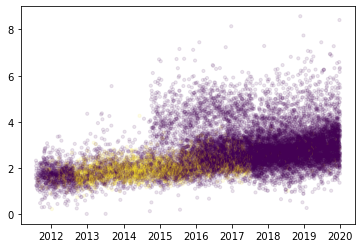

In [185]:
plt.scatter(m_nonan['Start Date'], m_nonan['Energy (kWh)'], c = m_nonan['Level 1'], alpha = 0.1, s = 10)
plt.show()

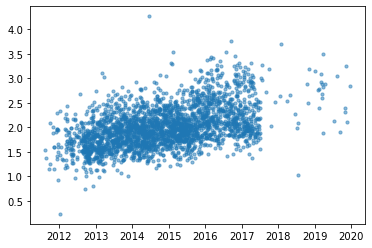

In [190]:
plt.scatter(m_nonan[m_nonan['Level 1'] == 1]['Start Date'], m_nonan[m_nonan['Level 1'] == 1]['Energy (kWh)'], alpha = 0.5, s = 10)
plt.show()

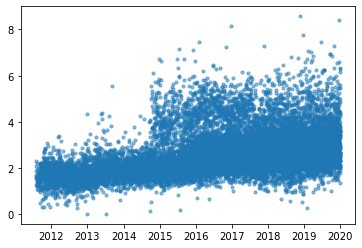

In [191]:
plt.scatter(m_nonan[m_nonan['Level 2'] == 1]['Start Date'], m_nonan[m_nonan['Level 2'] == 1]['Energy (kWh)'], alpha = 0.5, s = 10)
plt.show()

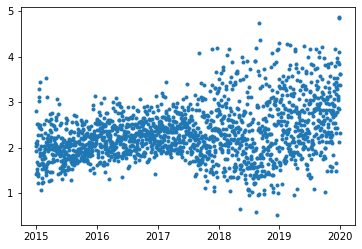

In [135]:
plt.plot(m_nonan[m_nonan['Cluster_4.0'] == 1]['Start Date'], m_nonan[m_nonan['Cluster_4.0'] == 1]['Energy (kWh)'], '.')
plt.show()

In [ ]:
X_train2,X_test2, X_val2,y_train2,y_test2, y_val2 = m.ttsplit(m_nonan, shuffle=True)

In [104]:
X_train2.columns

Index(['# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', 'Cluster_0.0', 'Cluster_1.0', 'Cluster_2.0',
       'Cluster_3.0', 'Cluster_4.0', 'Cluster_5.0', 'Cluster_6.0',
       'Cluster_7.0'],
      dtype='object')

In [105]:
from sklearn.linear_model import LinearRegression
linreg2=LinearRegression(fit_intercept = False)
linreg2.fit(X_train2, y_train2)
y_pred2 =linreg2.predict(X_test2)

#y_test #true values 
print(rmse(y_pred2, y_test2))

0.598505083968845


In [106]:
dict(zip(X_train2.columns, linreg2.coef_))

{'# Professional & Other Places': 0.06529872339343518,
 '# Food': -0.09120979133662617,
 '# Shop & Service': 0.014694957588076754,
 '# Travel & Transport': 0.05448000979409086,
 '# Outdoors & Recreation': 0.0101823200298853,
 '# Arts & Entertainment': -0.054279068660124725,
 '# Nightlife Spot': -0.019943315399936632,
 '# Residence': 0.04626071326322992,
 '# College & University': -0.07067047534126039,
 'Cluster_0.0': -0.009605908153509812,
 'Cluster_1.0': -0.0005880920821559304,
 'Cluster_2.0': 0.012035251448150517,
 'Cluster_3.0': 0.009556824027370538,
 'Cluster_4.0': -0.002914756784183623,
 'Cluster_5.0': -0.006557579499668394,
 'Cluster_6.0': 0.004390888857482722,
 'Cluster_7.0': -0.0011263351090553067}

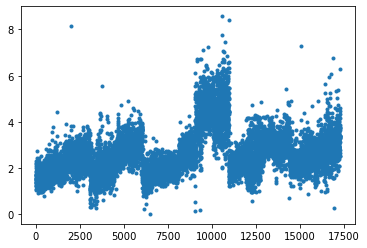

In [107]:
plt.plot(y_train2, '.')
plt.show()